In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from src.preprocessing import load_dataset, preprocess_data
from src.model import train_model, save_model
from src.evaluate import evaluate_model

In [7]:
sns.set(style='whitegrid', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

In [8]:
path = r'C:\Users\Lenovo\OneDrive\Desktop\Employee-Attrition-Prediction model for clg\data\IBM-HR2.csv'
df = load_dataset(path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
print("\n🧾 Shape:", df.shape)
print("\n📦 Data Types:\n", df.dtypes)
print("\n❗ Missing Values:\n", df.isnull().sum())
print("\n🔍 Unique Values Per Column:\n", df.nunique())


🧾 Shape: (1470, 35)

📦 Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19060\1807565452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


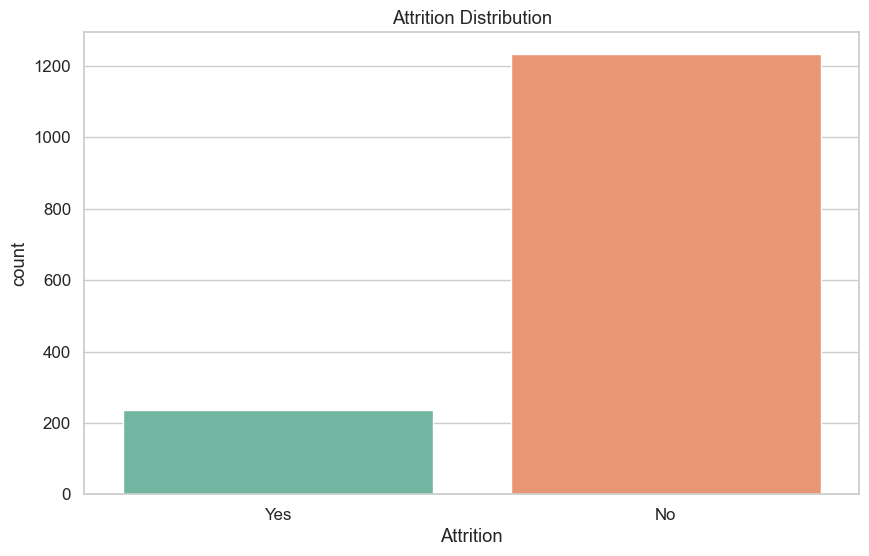

In [10]:
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.show()


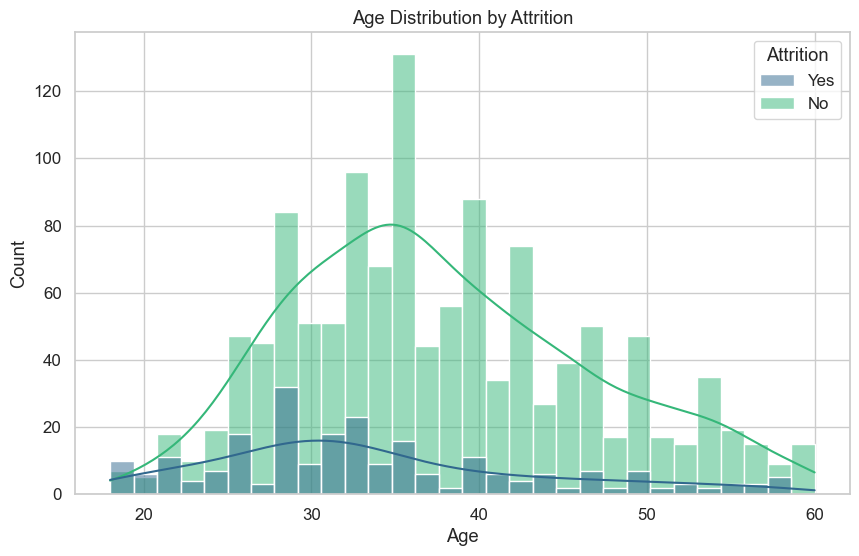

In [11]:
# Age Distribution
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, palette='viridis', bins=30)
plt.title("Age Distribution by Attrition")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19060\3253204998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')


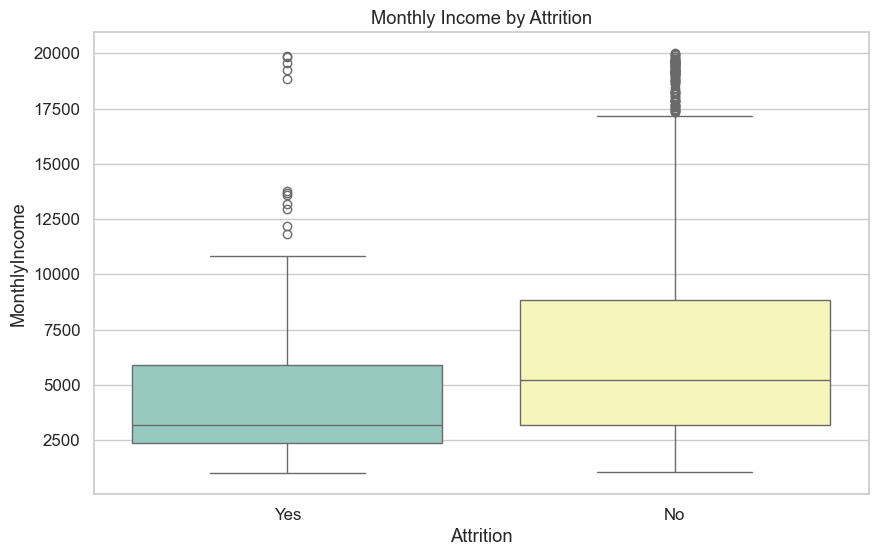

In [12]:

# Boxplot - MonthlyIncome vs Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title("Monthly Income by Attrition")
plt.show()

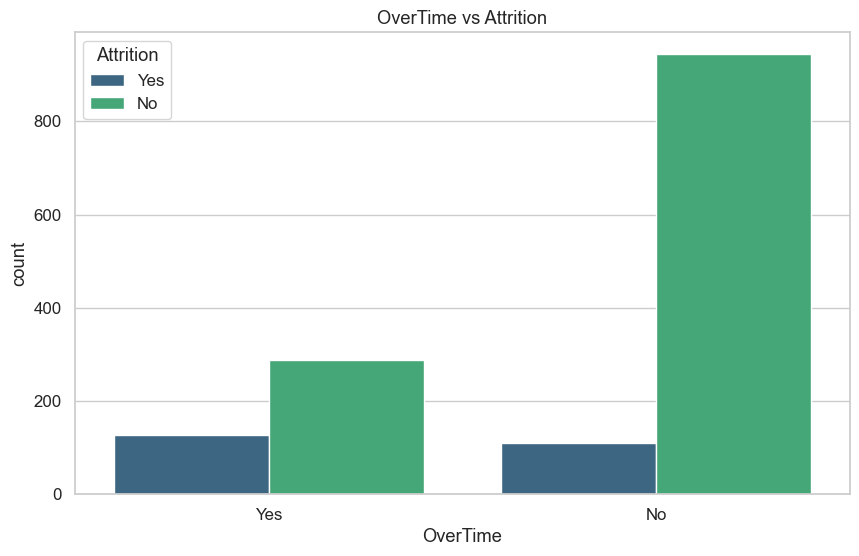

In [13]:

# OverTime vs Attrition
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='viridis')
plt.title("OverTime vs Attrition")
plt.show()

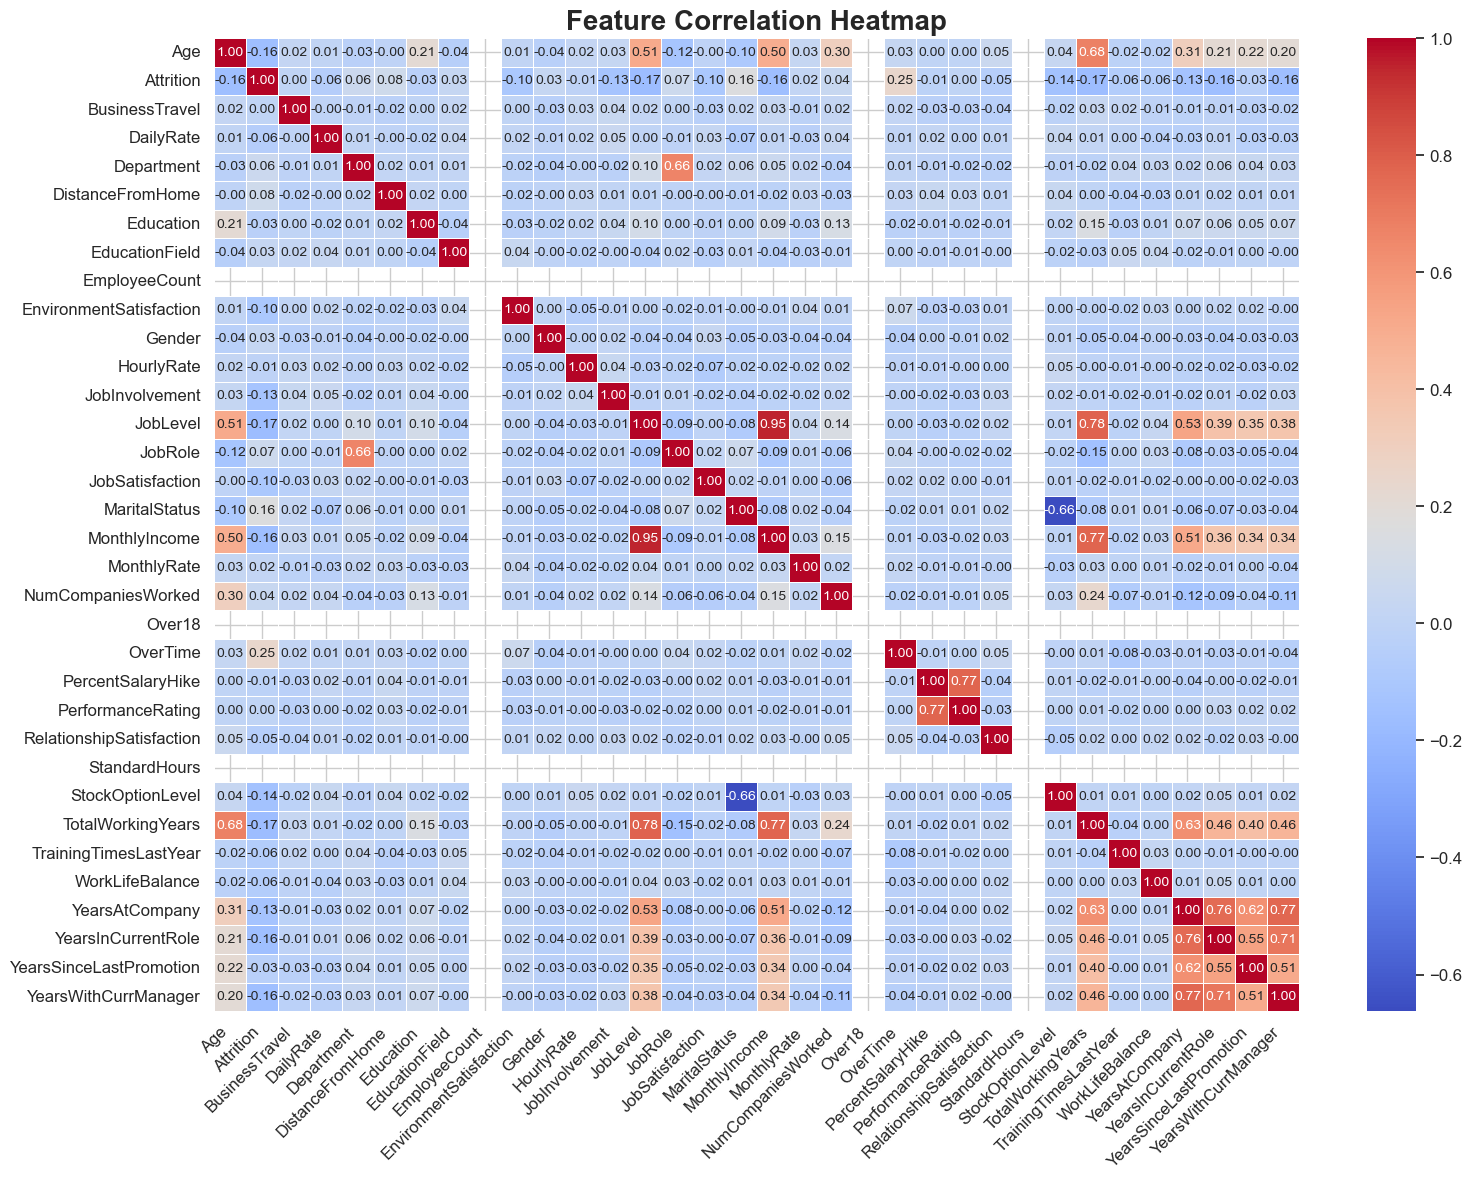

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(16, 12))
corr_matrix = df.corr(numeric_only=True)

# Create heatmap with improved text size and layout
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=20, fontweight='bold')  # Larger title size
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Adjust y-axis label size
plt.tight_layout()  # Adjust layout to reduce overlapping
plt.show()

In [15]:
# 4. Preprocessing
X_train, X_test, y_train, y_test = preprocess_data(df)

In [ ]:
#  5. Model Training
clf = train_model(X_train, y_train)


--- Classification Report ---

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       247
           1       0.39      0.32      0.35        47

    accuracy                           0.81       294
   macro avg       0.63      0.61      0.62       294
weighted avg       0.80      0.81      0.80       294



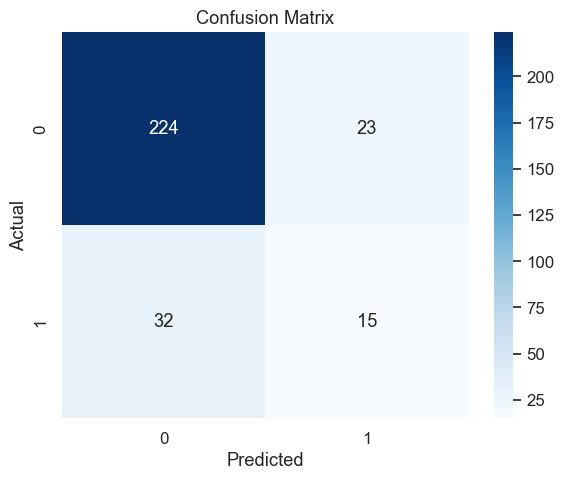

In [ ]:

#  6. Model Evaluation
evaluate_model(clf, X_test, y_test)


In [ ]:
#  7. Save the Trained Model
save_model(clf, path='models/model.pkl')

✅ Model saved to: models/model.pkl
